<a href="https://colab.research.google.com/github/owenfink9/covid19/blob/master/covid_19_kaggle_clean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Load Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
np.set_printoptions(suppress=True)

In [3]:
from google.colab import files
uploaded = files.upload()

Saving covid_kaggle.xlsx to covid_kaggle.xlsx


In [4]:
covid = pd.read_excel("covid_kaggle.xlsx")

In [5]:
covid.shape

(5644, 111)

# 1. Data Wash

Remove test results for other viruses, we'd like to predict the SARS-Cov-2 test result.

In [6]:
covid = covid.drop(['Respiratory Syncytial Virus', 'Influenza A', 'Influenza B', 'Parainfluenza 1', 'CoronavirusNL63', 'Parainfluenza 1', 'Chlamydophila pneumoniae', 'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43', 'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus', 'Rhinovirus/Enterovirus', 'Coronavirus HKU1', 'Parainfluenza 3', 'Influenza B, rapid test', 'Influenza A, rapid test'], axis=1)

Remove irrelvalent Features including patients ID and patients intention to the ward level.

In [7]:
covid = covid.drop(['Patient ID', 'Patient addmited to regular ward (1=yes, 0=no)', 'Patient addmited to semi-intensive unit (1=yes, 0=no)', 'Patient addmited to intensive care unit (1=yes, 0=no)'], axis=1)

Less than 100 patients among 5644 took urine tests.

In [8]:
urine_features = ['Urine - Esterase', 'Urine - Aspect', 'Urine - pH', 'Urine - Hemoglobin', 'Urine - Bile pigments', 'Urine - Ketone Bodies', 'Urine - Nitrite', 'Urine - Density', 'Urine - Urobilinogen', 'Urine - Protein', 'Urine - Sugar', 'Urine - Leukocytes', 'Urine - Crystals', 'Urine - Red blood cells', 'Urine - Hyaline cylinders', 'Urine - Granular cylinders', 'Urine - Yeasts', 'Urine - Color']

In [9]:
covid = covid.drop(urine_features, axis=1)

Less than 100 patients among 5644 took aerial blood gas tests.

In [10]:
arterial_blood_gas_features = ['Hb saturation (arterial blood gases)', 'pCO2 (arterial blood gas analysis)', 'Base excess (arterial blood gas analysis)', 'pH (arterial blood gas analysis)', 'Total CO2 (arterial blood gas analysis)', 'HCO3 (arterial blood gas analysis)', 'pO2 (arterial blood gas analysis)', 'Arteiral Fio2', 'Phosphor', 'ctO2 (arterial blood gas analysis)']

In [11]:
covid = covid.drop(arterial_blood_gas_features, axis=1)

Reamove features containing less than 100 patients' records

In [12]:
i = 0
for column in covid:
    if (covid[column].count() < 100):
        print(column, covid[column].count())
        covid = covid.drop(column, axis=1)

Mycoplasma pneumoniae 0
Ionized calcium  50
Magnesium 40
Fio2 (venous blood gas analysis) 1
Rods # 97
Segmented 97
Promyelocytes 97
Metamyelocytes 97
Myelocytes 97
Myeloblasts 97
Partial thromboplastin time (PTT)  0
Relationship (Patient/Normal) 91
Prothrombin time (PT), Activity 0
Vitamin B12 3
Ferritin 23
Arterial Lactic Acid 27
Lipase dosage 8
D-Dimer 0
Albumin 13


Drop constant features

In [13]:
covid = covid.loc[:,covid.apply(pd.Series.nunique) != 1]

Drop features has least patients' records

In [14]:
features = list(covid.columns)
sorted_features = [x for _,x in sorted(zip(covid[features].count(), features))]

In [15]:
# [ [covid.columns.get_loc(c), c] for c in sorted_features if c in covid]

Now all features contain at least 100 patients' record

In [16]:
covid_init = covid[sorted_features[-1]]
for i in reversed(range(0, len(sorted_features))):
    print(sorted_features[i], covid[sorted_features[i]].count())

SARS-Cov-2 exam result 5644
Patient age quantile 5644
Hemoglobin 603
Hematocrit 603
Red blood cell distribution width (RDW) 602
Red blood Cells 602
Platelets 602
Mean corpuscular volume (MCV) 602
Mean corpuscular hemoglobin concentration (MCHC) 602
Mean corpuscular hemoglobin (MCH) 602
Lymphocytes 602
Leukocytes 602
Eosinophils 602
Basophils 602
Monocytes 601
Mean platelet volume  599
Neutrophils 513
Proteina C reativa mg/dL 506
Creatinine 424
Urea 397
Potassium 371
Sodium 370
Strepto A 332
Aspartate transaminase 226
Alanine transaminase 225
Serum Glucose 208
Total Bilirubin 182
Indirect Bilirubin 182
Direct Bilirubin 182
Gamma-glutamyltransferase  153
Alkaline phosphatase 144
pO2 (venous blood gas analysis) 136
pH (venous blood gas analysis) 136
pCO2 (venous blood gas analysis) 136
Total CO2 (venous blood gas analysis) 136
Hb saturation (venous blood gas analysis) 136
HCO3 (venous blood gas analysis) 136
Base excess (venous blood gas analysis) 136
International normalized ratio (INR) 

In [17]:
removed_features = ['Lactic Dehydrogenase', 'Creatine phosphokinase\xa0(CPK)\xa0', 'International normalized ratio (INR)', 'Base excess (venous blood gas analysis)', 'HCO3 (venous blood gas analysis)', 'Hb saturation (venous blood gas analysis)', 'Total CO2 (venous blood gas analysis)', 'pCO2 (venous blood gas analysis)', 'pH (venous blood gas analysis)', 'pO2 (venous blood gas analysis)', 'Alkaline phosphatase', 'Gamma-glutamyltransferase\xa0', 'Direct Bilirubin', 'Indirect Bilirubin', 'Total Bilirubin', 'Serum Glucose', 'Alanine transaminase', 'Aspartate transaminase', 'Strepto A', 'Sodium', 'Potassium', 'Urea', 'Creatinine']

In [18]:
covid = covid.drop(removed_features, axis=1)

In [19]:
covid.shape

(5644, 18)

Drop patients that have less than 10 records

In [20]:
for index, row in covid.iterrows():
    if row.count() < 10:
        covid.drop(index, inplace=True)

Now we have more than 500 records

In [21]:
features = list(covid.columns)
sorted_features = [x for _,x in sorted(zip(covid[features].count(), features))]
for i in reversed(range(0, len(sorted_features))):
    print(sorted_features[i], covid[sorted_features[i]].count())

SARS-Cov-2 exam result 602
Red blood cell distribution width (RDW) 602
Red blood Cells 602
Platelets 602
Patient age quantile 602
Mean corpuscular volume (MCV) 602
Mean corpuscular hemoglobin concentration (MCHC) 602
Mean corpuscular hemoglobin (MCH) 602
Lymphocytes 602
Leukocytes 602
Hemoglobin 602
Hematocrit 602
Eosinophils 602
Basophils 602
Monocytes 601
Mean platelet volume  599
Neutrophils 513
Proteina C reativa mg/dL 502


Drop NaN

In [22]:
covid = covid.dropna()

Map classification string to 0-1

In [23]:
covid['SARS-Cov-2 exam result'] = covid['SARS-Cov-2 exam result'].map({'positive': 1, 'negative': 0})

In [24]:
covid.shape

(420, 18)

# 2. Train test split

In [25]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [26]:
y = covid["SARS-Cov-2 exam result"].to_numpy()

In [27]:
X = covid
X = X.drop(["SARS-Cov-2 exam result"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 1)

In [28]:
X_train.shape

(294, 17)

In [29]:
X_test.shape

(126, 17)

In [30]:
y_test

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0])

In [31]:
print(np.sum(y_test), "positive among", len(y_test), 'patients')

18 positive among 126 patients


# SMOTE

In [32]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_smote_train, y_smote_train = os.fit_resample(X_train, y_train)

In [33]:
print(np.sum(y_smote_train), "positive among", len(y_smote_train), 'patients')

253 positive among 506 patients


# 3. Feature Selection

### 3.1 Basic Methods

#### 3.1.1 Drop constant and Quasi-constant features

In [34]:
from sklearn.feature_selection import VarianceThreshold

In [35]:
def drop_features(X_train, X_test, threshhold):
    sel = VarianceThreshold(threshold=threshhold)
    sel.fit(X_train)
    print("No. of constant features:",
        len([
            x for x in X_train.columns
            if x not in X_train.columns[sel.get_support()]
        ])
    )
    constant_features = [x for x in X_train.columns if x not in X_train.columns[sel.get_support()]]

    print(constant_features)
    X_train.drop(labels=constant_features, axis=1, inplace=True)
    X_test.drop(labels=constant_features, axis=1, inplace=True)

In [36]:
drop_features(X_train, X_test, 0.01)
drop_features(X_smote_train, X_test, 0.01)

No. of constant features: 0
[]
No. of constant features: 0
[]


#### 3.1.2 Drop Duplicated Features

In [37]:
covid_t = covid.T
print("No. of Duplicated Features:", covid_t.duplicated().sum())
print(covid_t[covid_t.duplicated()].index.values)

No. of Duplicated Features: 0
[]


### 3.2 Correlations

In [38]:
corrmat = X_train.corr()
corrmat = corrmat.abs().unstack()
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat[corrmat >= 0.8]
corrmat = corrmat[corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1', 'feature2', 'corr']
corrmat

,feature1,feature2,corr
0,Hematocrit,Hemoglobin,0.969368
1,Hemoglobin,Hematocrit,0.969368
2,Lymphocytes,Neutrophils,0.930390
3,Neutrophils,Lymphocytes,0.930390
4,Hematocrit,Red blood Cells,0.922796
5,Red blood Cells,Hematocrit,0.922796
6,Red blood Cells,Hemoglobin,0.900011
7,Hemoglobin,Red blood Cells,0.900011
8,Mean corpuscular hemoglobin (MCH),Mean corpuscular volume (MCV),0.856345
9,Mean corpuscular volume (MCV),Mean corpuscular hemoglobin (MCH),0.856345


In [39]:
# find groups of correlated features

grouped_feature_ls = []
correlated_groups = []

for feature in corrmat.feature1.unique():
    if feature not in grouped_feature_ls:

        # find all features correlated to a single feature
        correlated_block = corrmat[corrmat.feature1 == feature]
        grouped_feature_ls = grouped_feature_ls + list(
            correlated_block.feature2.unique()) + [feature]

        # append the block of features to the list
        correlated_groups.append(correlated_block)

print('found {} correlated groups'.format(len(correlated_groups)))
print('out of {} total features'.format(X_train.shape[1]))

found 3 correlated groups
out of 17 total features


In [40]:
# now we can visualise each group. We see that some groups contain
# only 2 correlated features, some other groups present several features 
# that are correlated among themselves.

for group in correlated_groups:
    print(group)
    print()

     feature1         feature2      corr
0  Hematocrit       Hemoglobin  0.969368
4  Hematocrit  Red blood Cells  0.922796

      feature1     feature2     corr
2  Lymphocytes  Neutrophils  0.93039

                            feature1                       feature2      corr
8  Mean corpuscular hemoglobin (MCH)  Mean corpuscular volume (MCV)  0.856345



In [41]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j] >= threshold):
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [42]:
corr_features = list((correlation(X_train, 0.8)))
print(corr_features)

['Mean corpuscular volume (MCV)', 'Red blood Cells', 'Hemoglobin']


In [43]:
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_smote_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)

In [44]:
X_train.shape, X_smote_train.shape, X_test.shape

((294, 14), (506, 14), (126, 14))

### 3.3 Statistical Methods

#### 3.3.1 Mutual Information

In [45]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [46]:
mi = mutual_info_classif(X_train, y_train)
mi = pd.Series(mi)
mi.index = X_train.columns

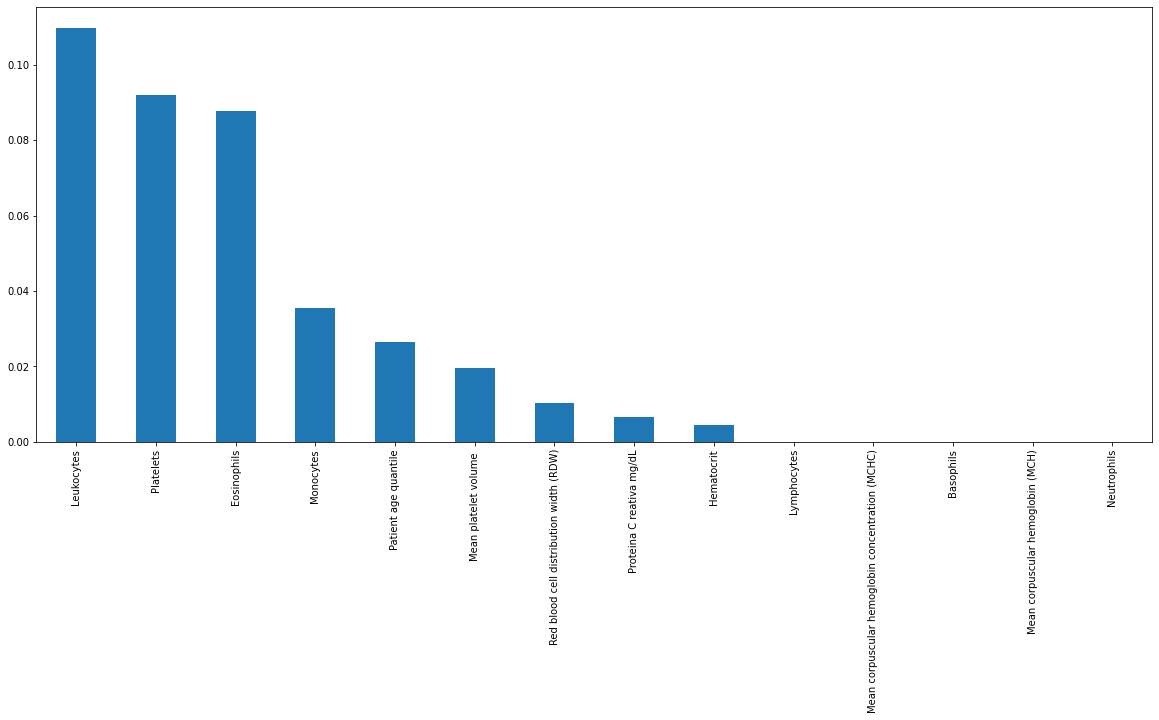

In [47]:
mi.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [48]:
sel_ = SelectKBest(mutual_info_classif, k = 10).fit(X_train, y_train)
sel_smote_ = SelectKBest(mutual_info_classif, k = 10).fit(X_smote_train, y_smote_train)

In [49]:
mi_features = list(X_train.columns[ ~ sel_.get_support()].values)
mi_features_smote = list(X_smote_train.columns[ ~ sel_.get_support()].values)

In [50]:
mi_features

['Hematocrit',
 'Lymphocytes',
 'Mean corpuscular hemoglobin concentration\xa0(MCHC)',
 'Mean corpuscular hemoglobin (MCH)']

In [51]:
mi_features_smote

['Hematocrit',
 'Lymphocytes',
 'Mean corpuscular hemoglobin concentration\xa0(MCHC)',
 'Mean corpuscular hemoglobin (MCH)']

In [52]:
X_train.drop(labels=mi_features, axis=1, inplace=True)
X_smote_train.drop(labels=mi_features_smote, axis=1, inplace=True)
X_test.drop(labels=mi_features, axis=1, inplace=True)

In [53]:
X_train.shape

(294, 10)

In [54]:
X_smote_train.shape

(506, 10)

In [55]:
X_test.shape

(126, 10)

# 3. Classifier

In [56]:
import sklearn
import sklearn.ensemble
import sklearn.metrics
import xgboost as xgb

In [57]:
from sklearn.model_selection import cross_val_score

In [58]:
def cv_score(classifier, X, y, scoring):
    return cross_val_score(classifier, X, y, cv=5, scoring=scoring)

## 3.1.1 Decision Tree - Original

In [59]:
dt = sklearn.tree.DecisionTreeClassifier()

dt_f1 = cv_score(dt, X_train, y_train, 'f1')

dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [60]:
print(np.mean(dt_f1))

0.3654761904761905


In [61]:
dt_pred = dt.predict(X_test)

print("Decision Tree")
print("Precision: ", sklearn.metrics.accuracy_score(y_test, dt_pred))
print("Recal: ", sklearn.metrics.recall_score(y_test, dt_pred))
print("F1: ", sklearn.metrics.f1_score(y_test, dt_pred))

Decision Tree
Precision:  0.8095238095238095
Recal:  0.3888888888888889
F1:  0.36842105263157887


In [62]:
print('Prediction:', ' '.join(str(e) for e in dt_pred))
print('     Truth:', ' '.join(str(e) for e in y_test))

Prediction: 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0
     Truth: 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0


## 3.1.2 Decision Tree - SMOTE

In [63]:
dt_smote = sklearn.tree.DecisionTreeClassifier()

dt_smote_f1 = cv_score(dt_smote, X_smote_train, y_smote_train, 'f1')

dt_smote.fit(X_smote_train, y_smote_train)

DecisionTreeClassifier()

In [64]:
print(np.mean(dt_smote_f1))

0.8882242680696999


In [65]:
dt_smote_pred = dt.predict(X_test)

print("Decision Tree")
print("Precision: ", sklearn.metrics.accuracy_score(y_test, dt_smote_pred))
print("Recal: ", sklearn.metrics.recall_score(y_test, dt_smote_pred))
print("F1: ", sklearn.metrics.f1_score(y_test, dt_smote_pred))

Decision Tree
Precision:  0.8095238095238095
Recal:  0.3888888888888889
F1:  0.36842105263157887


In [66]:
print('Prediction:', ' '.join(str(e) for e in dt_smote_pred))
print('     Truth:', ' '.join(str(e) for e in y_test))

Prediction: 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0
     Truth: 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0


## 3.2.1 Random Forests - Original

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
rf = sklearn.ensemble.RandomForestClassifier(n_estimators=100)

rf_f1 = cv_score(rf, X_train, y_train, 'f1')

rf.fit(X_train, y_train)

RandomForestClassifier()

In [69]:
print(np.mean(rf_f1))

0.3374358974358974


In [70]:
rf_pred = rf.predict(X_test)

print("Random Forest")
print("Precision: ", sklearn.metrics.accuracy_score(y_test, rf_pred))
print("Recal: ", sklearn.metrics.recall_score(y_test, rf_pred))
print("F1: ", sklearn.metrics.f1_score(y_test, rf_pred))

Random Forest
Precision:  0.8650793650793651
Recal:  0.3333333333333333
F1:  0.41379310344827586


In [71]:
print('Prediction:', ' '.join(str(e) for e in rf_pred))
print('     Truth:', ' '.join(str(e) for e in y_test))

Prediction: 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0
     Truth: 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0


## 3.2.2 Random Forests - SMOTE

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
rf_smote = sklearn.ensemble.RandomForestClassifier(n_estimators=100)

rf_smote_f1 = cv_score(rf_smote, X_smote_train, y_smote_train, 'f1')

rf_smote.fit(X_smote_train, y_smote_train)

RandomForestClassifier()

In [74]:
print(np.mean(rf_smote_f1))

0.9582610413678374


In [75]:
rf_smote_pred = rf_smote.predict(X_test)

print("Random Forest")
print("Precision: ", sklearn.metrics.accuracy_score(y_test, rf_smote_pred))
print("Recal: ", sklearn.metrics.recall_score(y_test, rf_smote_pred))
print("F1: ", sklearn.metrics.f1_score(y_test, rf_smote_pred))

Random Forest
Precision:  0.9365079365079365
Recal:  0.7777777777777778
F1:  0.7777777777777778


In [76]:
print('Prediction:', ' '.join(str(e) for e in rf_smote_pred))
print('     Truth:', ' '.join(str(e) for e in y_test))

Prediction: 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0
     Truth: 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0


# 3.3.1 XGBoost - Original

In [77]:
# Create a model
# Params from: https://www.kaggle.com/aharless/swetha-s-xgboost-revised
xgbc = xgb.XGBClassifier(
    max_depth = 4,
    subsample = 0.8,
    colsample_bytree = 0.7,
    colsample_bylevel = 0.7,
    scale_pos_weight = 9,
    min_child_weight = 0,
    reg_alpha = 4,
    objective = 'binary:logistic',
    use_label_encoder=False,
    eval_metric='error'
)

xgbc_f1 = cv_score(xgbc, np.array(X_train), np.array(y_train), 'f1')

# Fit the models
xgbc.fit(np.array(X_train), np.array(y_train))

XGBClassifier(colsample_bylevel=0.7, colsample_bytree=0.7, eval_metric='error',
              max_depth=4, min_child_weight=0, reg_alpha=4, scale_pos_weight=9,
              subsample=0.8, use_label_encoder=False)

In [78]:
xgbc_pred = xgbc.predict(np.array(X_test))

print("XGBoost")
print("Precision: ", sklearn.metrics.accuracy_score(y_test, xgbc_pred))
print("Recal: ", sklearn.metrics.recall_score(y_test, xgbc_pred))
print("F1: ", sklearn.metrics.f1_score(y_test, xgbc_pred))

XGBoost
Precision:  0.8571428571428571
Recal:  0.7777777777777778
F1:  0.6086956521739131


In [79]:
print(np.mean(xgbc_f1))

0.5894636906145858


In [80]:
print('Prediction:', ' '.join(str(e) for e in xgbc_pred))
print('     Truth:', ' '.join(str(e) for e in y_test))

Prediction: 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0
     Truth: 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0


# 3.3.2 XGBoost - SMOTE

In [81]:
# Create a model
# Params from: https://www.kaggle.com/aharless/swetha-s-xgboost-revised
xgbc_smote = xgb.XGBClassifier(
    max_depth = 4,
    subsample = 0.8,
    colsample_bytree = 0.7,
    colsample_bylevel = 0.7,
    scale_pos_weight = 9,
    min_child_weight = 0,
    reg_alpha = 4,
    objective = 'binary:logistic',
    use_label_encoder=False,
    eval_metric='error'
)

xgbc_smote_f1 = cv_score(xgbc_smote, np.array(X_smote_train), np.array(y_smote_train), 'f1')

# Fit the models
xgbc_smote.fit(np.array(X_smote_train), np.array(y_smote_train))

XGBClassifier(colsample_bylevel=0.7, colsample_bytree=0.7, eval_metric='error',
              max_depth=4, min_child_weight=0, reg_alpha=4, scale_pos_weight=9,
              subsample=0.8, use_label_encoder=False)

In [82]:
xgbc_smote_pred = xgbc_smote.predict(np.array(X_test))

print("XGBoost")
print("Precision: ", sklearn.metrics.accuracy_score(y_test, xgbc_smote_pred))
print("Recal: ", sklearn.metrics.recall_score(y_test, xgbc_smote_pred))
print("F1: ", sklearn.metrics.f1_score(y_test, xgbc_smote_pred))

XGBoost
Precision:  0.8095238095238095
Recal:  0.7777777777777778
F1:  0.5384615384615384


In [83]:
print(np.mean(xgbc_smote_f1))

0.9120750792744998


In [84]:
print('Prediction:', ' '.join(str(e) for e in xgbc_smote_pred))
print('     Truth:', ' '.join(str(e) for e in y_test))

Prediction: 1 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0
     Truth: 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0


# 3.4.1 Logistic Regression - Original

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr = LogisticRegression()

lr_f1 = cv_score(lr, X_train, y_train, 'f1')

lr.fit(X_train, y_train)

LogisticRegression()

In [86]:
print(np.mean(lr_f1))

0.4288095238095238


In [87]:
lr_pred = lr.predict(X_test)

print("Decision Tree")
print("Precision: ", sklearn.metrics.accuracy_score(y_test, lr_pred))
print("Recal: ", sklearn.metrics.recall_score(y_test, lr_pred))
print("F1: ", sklearn.metrics.f1_score(y_test, lr_pred))

Decision Tree
Precision:  0.9047619047619048
Recal:  0.5
F1:  0.6


In [88]:
print('Prediction:', ' '.join(str(e) for e in lr_pred))
print('     Truth:', ' '.join(str(e) for e in y_test))

Prediction: 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0
     Truth: 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0


# 3.4.2 Logistic Regression - SMOTE

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr_smote = LogisticRegression()

lr_smote_f1 = cv_score(lr_smote, X_smote_train, y_smote_train, 'f1')

lr_smote.fit(X_smote_train, y_smote_train)

LogisticRegression()

In [90]:
print(np.mean(lr_smote_f1))

0.909770015916805


In [91]:
lr_smote_pred = lr_smote.predict(X_test)

print("Decision Tree")
print("Precision: ", sklearn.metrics.accuracy_score(y_test, lr_smote_pred))
print("Recal: ", sklearn.metrics.recall_score(y_test, lr_smote_pred))
print("F1: ", sklearn.metrics.f1_score(y_test, lr_smote_pred))

Decision Tree
Precision:  0.8095238095238095
Recal:  0.7222222222222222
F1:  0.52


In [92]:
print('Prediction:', ' '.join(str(e) for e in lr_smote_pred))
print('     Truth:', ' '.join(str(e) for e in y_test))

Prediction: 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0
     Truth: 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0


# Stacking

In [100]:
X_stacking = pd.DataFrame(X_test.index)
rf_smote_pred_df = pd.DataFrame(rf_smote_pred)
xgbc_pred_df = pd.DataFrame(xgbc_pred)
xgbc_smote_pred_df = pd.DataFrame(xgbc_smote_pred)
lr_pred_df = pd.DataFrame(lr_pred)
lr_smote_pred_df = pd.DataFrame(lr_smote_pred)

In [101]:
X_stacking = pd.merge(X_stacking, rf_smote_pred_df, left_index=True, right_index=True)
X_stacking = pd.merge(X_stacking, xgbc_pred_df, left_index=True, right_index=True)
X_stacking = pd.merge(X_stacking, xgbc_smote_pred_df, left_index=True, right_index=True)
X_stacking = pd.merge(X_stacking, lr_pred_df, left_index=True, right_index=True)
X_stacking = pd.merge(X_stacking, lr_smote_pred_df, left_index=True, right_index=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'0_x'} in the result is deprecated and will raise a MergeError in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Passing 'suffixes' which cause duplicate columns {'0_x'} in the result is deprecated and will raise a MergeError in a future version.
  """


In [102]:
X_stacking.columns = ['id','Random_Forest_SMOTE','XGBoost','XGBoost_SMOTE','Logistic_Regression','Logistic_Regression_SMOTE']
X_stacking['Average'] = ( X_stacking['Random_Forest_SMOTE'] + X_stacking['XGBoost'] + X_stacking['XGBoost_SMOTE'] + X_stacking['Logistic_Regression'] + X_stacking['Logistic_Regression_SMOTE'] ) / 5
X_stacking['Prediction'] = [1 if x > 0.5 else 0 for x in X_stacking['Average']]
stack_pred = np.array(X_stacking['Prediction'])

In [103]:
print("Stacking")
print("Precision: ", sklearn.metrics.accuracy_score(y_test, stack_pred))
print("Recal: ", sklearn.metrics.recall_score(y_test, stack_pred))
print("F1: ", sklearn.metrics.f1_score(y_test, stack_pred))

Stacking
Precision:  0.873015873015873
Recal:  0.7777777777777778
F1:  0.6363636363636364


In [104]:
print('Prediction:', ' '.join(str(e) for e in stack_pred))
print('     Truth:', ' '.join(str(e) for e in y_test))

Prediction: 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0
     Truth: 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0


# 4. Prediction

In [105]:
import math

In [107]:
print("Decision Tree - Original")
print("Precision: ", sklearn.metrics.accuracy_score(y_test, dt_pred))
print("Recal: ", sklearn.metrics.recall_score(y_test, dt_pred))
print("F1: ", sklearn.metrics.f1_score(y_test, dt_pred))
print("CI:", 1.96 * math.sqrt( ((1 - sklearn.metrics.accuracy_score(y_test, dt_pred)) * (sklearn.metrics.accuracy_score(y_test, dt_pred))) / len(X_test)))

print()

print("Decision Tree - SMOTE")
print("Precision: ", sklearn.metrics.accuracy_score(y_test, dt_smote_pred))
print("Recal: ", sklearn.metrics.recall_score(y_test, dt_smote_pred))
print("F1: ", sklearn.metrics.f1_score(y_test, dt_smote_pred))
print("CI:", 1.96 * math.sqrt( ((1 - sklearn.metrics.accuracy_score(y_test, dt_smote_pred)) * (sklearn.metrics.accuracy_score(y_test, dt_smote_pred))) / len(X_test)))

print()

print("Random Forest - Original")
print("Precision: ", sklearn.metrics.accuracy_score(y_test, rf_pred))
print("Recal: ", sklearn.metrics.recall_score(y_test, rf_pred))
print("F1: ", sklearn.metrics.f1_score(y_test, rf_pred))
print("CI:", 1.96 * math.sqrt( ((1 - sklearn.metrics.accuracy_score(y_test, rf_pred)) * (sklearn.metrics.accuracy_score(y_test, rf_pred))) / len(X_test)))

print()

print("Random Forest - SMOTE")
print("Precision: ", sklearn.metrics.accuracy_score(y_test, rf_smote_pred))
print("Recal: ", sklearn.metrics.recall_score(y_test, rf_smote_pred))
print("F1: ", sklearn.metrics.f1_score(y_test, rf_smote_pred))
print("CI:", 1.96 * math.sqrt( ((1 - sklearn.metrics.accuracy_score(y_test, rf_smote_pred)) * (sklearn.metrics.accuracy_score(y_test, rf_smote_pred))) / len(X_test)))

print()

print("XGBoost - Original")
print("Precision: ", sklearn.metrics.accuracy_score(y_test, xgbc_pred))
print("Recal: ", sklearn.metrics.recall_score(y_test, xgbc_pred))
print("F1: ", sklearn.metrics.f1_score(y_test, xgbc_pred))
print("CI:", 1.96 * math.sqrt( ((1 - sklearn.metrics.accuracy_score(y_test, xgbc_pred)) * (sklearn.metrics.accuracy_score(y_test, xgbc_pred))) / len(X_test)))

print()

print("XGBoost - SMOTE")
print("Precision: ", sklearn.metrics.accuracy_score(y_test, xgbc_smote_pred))
print("Recal: ", sklearn.metrics.recall_score(y_test, xgbc_smote_pred))
print("F1: ", sklearn.metrics.f1_score(y_test, xgbc_smote_pred))
print("CI:", 1.96 * math.sqrt( ((1 - sklearn.metrics.accuracy_score(y_test, xgbc_smote_pred)) * (sklearn.metrics.accuracy_score(y_test, xgbc_smote_pred))) / len(X_test)))

print()

print("LR - Original")
print("Precision: ", sklearn.metrics.accuracy_score(y_test, lr_pred))
print("Recal: ", sklearn.metrics.recall_score(y_test, lr_pred))
print("F1: ", sklearn.metrics.f1_score(y_test, lr_pred))
print("CI:", 1.96 * math.sqrt( ((1 - sklearn.metrics.accuracy_score(y_test, lr_pred)) * (sklearn.metrics.accuracy_score(y_test, lr_pred))) / len(X_test)))

print()

print("LR - SMOTE")
print("Precision: ", sklearn.metrics.accuracy_score(y_test, lr_smote_pred))
print("Recal: ", sklearn.metrics.recall_score(y_test, lr_smote_pred))
print("F1: ", sklearn.metrics.f1_score(y_test, lr_smote_pred))
print("CI:", 1.96 * math.sqrt( ((1 - sklearn.metrics.accuracy_score(y_test, lr_smote_pred)) * (sklearn.metrics.accuracy_score(y_test, lr_smote_pred))) / len(X_test)))

print()

print("Stacking")
print("Precision: ", sklearn.metrics.accuracy_score(y_test, stack_pred))
print("Recal: ", sklearn.metrics.recall_score(y_test, stack_pred))
print("F1: ", sklearn.metrics.f1_score(y_test, stack_pred))

Decision Tree - Original
Precision:  0.8095238095238095
Recal:  0.3888888888888889
F1:  0.36842105263157887
CI: 0.06856554942462893

Decision Tree - SMOTE
Precision:  0.8095238095238095
Recal:  0.3888888888888889
F1:  0.36842105263157887
CI: 0.06856554942462893

Random Forest - Original
Precision:  0.8650793650793651
Recal:  0.3333333333333333
F1:  0.41379310344827586
CI: 0.059653779328748456

Random Forest - SMOTE
Precision:  0.9365079365079365
Recal:  0.7777777777777778
F1:  0.7777777777777778
CI: 0.04257809737244419

XGBoost - Original
Precision:  0.8571428571428571
Recal:  0.7777777777777778
F1:  0.6086956521739131
CI: 0.06110100926607787

XGBoost - SMOTE
Precision:  0.8095238095238095
Recal:  0.7777777777777778
F1:  0.5384615384615384
CI: 0.06856554942462893

LR - Original
Precision:  0.9047619047619048
Recal:  0.5
F1:  0.6
CI: 0.05125583375409242

LR - SMOTE
Precision:  0.8095238095238095
Recal:  0.7222222222222222
F1:  0.52
CI: 0.06856554942462893

Stacking
Precision:  0.8730158

In [109]:
print('Original:')
print(' Decision Tree:', ' '.join(str(e) for e in dt_pred))
print(' Random Forest:', ' '.join(str(e) for e in rf_pred))
print('       XGBoost:', ' '.join(str(e) for e in xgbc_pred))
print('  Logistic Reg:', ' '.join(str(e) for e in lr_pred))
print()
print('SMOTE:')
print(' Decision Tree:', ' '.join(str(e) for e in dt_smote_pred))
print(' Random Forest:', ' '.join(str(e) for e in rf_smote_pred))
print('       XGBoost:', ' '.join(str(e) for e in xgbc_smote_pred))
print('  Logistic Reg:', ' '.join(str(e) for e in lr_smote_pred))
print()
print('      Stacking:', ' '.join(str(e) for e in stack_pred))
print('         Truth:', ' '.join(str(e) for e in y_test))

Original:
 Decision Tree: 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0
 Random Forest: 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0
       XGBoost: 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0
  Logistic Reg: 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 

# 5. Save Results

## 5.1 Save model

In [ ]:
import pickle

In [ ]:
with open("model/model-3_kaggle.pkl", 'wb') as f:
    pickle.dump([dt, rf, xgbc], f)
# with open("model-4.pkl", 'wb') as f:
#     pickle.dump([dt, rf, xgbc, nn], f)
with open("dataset/dataset_kaggle.pkl", 'wb') as f:
    pickle.dump([X_train, X_test, y_train, y_test], f)

FileNotFoundError: ignored

In [ ]:
nn.model.save('model/nn_kaggle.h5')

## 5.2 Load Model

In [ ]:
import keras
from keras.models import load_model

In [ ]:
nn = load_model("model/nn_kaggle.h5")

OSError: ignored

In [ ]:
with open("model/model-3_kaggle.pkl", 'rb') as f:
    [dt, rf, xgbc] = pickle.load(f)

In [ ]:
with open("dataset/dataset_kaggle.pkl", 'rb') as f:
    [X_train, X_test, y_train, y_test] = pickle.load(f)

# 6. Explain

## 6.3 Feature Importance

In [110]:
from sklearn.inspection import permutation_importance
from matplotlib import pyplot

In [111]:
fi = {}
fi["dt"] = []
fi["rf"] = []
fi["xgbc"] = []
fi["lr"] = []
fi["dt_smote"] = []
fi["rf_smote"] = []
fi["xgbc_smote"] = []
fi["lr_smote"] = []

**Decision Tree - Original**

In [112]:
dt_results = permutation_importance(dt, X_train, y_train, scoring='accuracy')
dt_importance = dt_results.importances_mean
for i,v in enumerate(dt_importance):
    if v != 0:
        fi["dt"].append({
            'name': X_train.columns[i],
            'value': v
        })

In [113]:
fi["dt"] = sorted(fi["dt"], key=lambda x: x['value'], reverse=True)

**Decision Tree - SMOTE**

In [114]:
dt_smote_results = permutation_importance(dt_smote, X_smote_train, y_smote_train, scoring='accuracy')
dt_smote_importance = dt_smote_results.importances_mean
for i,v in enumerate(dt_smote_importance):
    if v != 0:
        fi["dt_smote"].append({
            'name': X_smote_train.columns[i],
            'value': v
        })

In [115]:
fi["dt_smote"] = sorted(fi["dt_smote"], key=lambda x: x['value'], reverse=True)

**Random Forests - Original**

In [116]:
rf_results = permutation_importance(rf, X_train, y_train, scoring='accuracy')
rf_importance = rf_results.importances_mean
for i,v in enumerate(rf_importance):
    if v != 0:
        fi["rf"].append({
            'name': X_train.columns[i],
            'value': v
        })

In [117]:
fi["rf"] = sorted(fi["rf"], key=lambda x: x['value'], reverse=True)

**Random Forests - SMOTE**

In [118]:
rf_smote_results = permutation_importance(rf_smote, X_smote_train, y_smote_train, scoring='accuracy')
rf_smote_importance = rf_smote_results.importances_mean
for i,v in enumerate(rf_smote_importance):
    if v != 0:
        fi["rf_smote"].append({
            'name': X_smote_train.columns[i],
            'value': v
        })

In [119]:
fi["rf_smote"] = sorted(fi["rf_smote"], key=lambda x: x['value'], reverse=True)

**Gradient Boosted Tree - Original**

In [120]:
xgbc_results = permutation_importance(xgbc, np.array(X_train), np.array(y_train), scoring='accuracy')
xgbc_importance = xgbc_results.importances_mean
for i,v in enumerate(xgbc_importance):
    if v != 0:
        fi["xgbc"].append({
            'name': X_train.columns[i],
            'value': v
        })

In [121]:
fi["xgbc"] = sorted(fi["xgbc"], key=lambda x: x['value'], reverse=True)

**Gradient Boosted Tree - SMOTE**

In [122]:
xgbc_smote_results = permutation_importance(xgbc_smote, np.array(X_smote_train), np.array(y_smote_train), scoring='accuracy')
xgbc_smote_importance = xgbc_smote_results.importances_mean
for i,v in enumerate(xgbc_smote_importance):
    if v != 0:
        fi["xgbc_smote"].append({
            'name': X_smote_train.columns[i],
            'value': v
        })

In [123]:
fi["xgbc_smote"] = sorted(fi["xgbc_smote"], key=lambda x: x['value'], reverse=True)

**Logistic Regression - Original**

In [124]:
lr_results = permutation_importance(lr, X_train, y_train, scoring='accuracy')
lr_importance = lr_results.importances_mean
for i,v in enumerate(lr_importance):
    if v != 0:
        fi["lr"].append({
            'name': X_train.columns[i],
            'value': v
        })

In [125]:
fi["lr"] = sorted(fi["lr"], key=lambda x: x['value'], reverse=True)

**Logistic Regression - SMOTE**

In [126]:
lr_smote_results = permutation_importance(lr_smote, X_smote_train, y_smote_train, scoring='accuracy')
lr_smote_importance = lr_smote_results.importances_mean
for i,v in enumerate(lr_smote_importance):
    if v != 0:
        fi["lr_smote"].append({
            'name': X_smote_train.columns[i],
            'value': v
        })

In [127]:
fi["lr_smote"] = sorted(fi["lr_smote"], key=lambda x: x['value'], reverse=True)

**Summmary**

In [128]:
print("Decision Tree - Original")
for i in fi["dt"]:
    print('Feature: %20s,\t Score: %.3f \t Actual: %.3f' % (i["name"],v, i["value"]))

Decision Tree - Original
Feature:           Leukocytes,	 Score: 0.019 	 Actual: 0.194
Feature:            Basophils,	 Score: 0.019 	 Actual: 0.086
Feature: Patient age quantile,	 Score: 0.019 	 Actual: 0.069
Feature: Red blood cell distribution width (RDW),	 Score: 0.019 	 Actual: 0.063
Feature:          Eosinophils,	 Score: 0.019 	 Actual: 0.044
Feature: Proteina C reativa mg/dL,	 Score: 0.019 	 Actual: 0.033
Feature:            Monocytes,	 Score: 0.019 	 Actual: 0.031
Feature: Mean platelet volume ,	 Score: 0.019 	 Actual: 0.016
Feature:          Neutrophils,	 Score: 0.019 	 Actual: 0.014
Feature:            Platelets,	 Score: 0.019 	 Actual: 0.013


In [129]:
print("Decision Tree - SMOTE")
for i in fi["dt_smote"]:
    print('Feature: %20s,\t Score: %.3f \t Actual: %.3f' % (i["name"],v, i["value"]))

Decision Tree - SMOTE
Feature:           Leukocytes,	 Score: 0.019 	 Actual: 0.248
Feature:          Eosinophils,	 Score: 0.019 	 Actual: 0.137
Feature:            Basophils,	 Score: 0.019 	 Actual: 0.104
Feature: Proteina C reativa mg/dL,	 Score: 0.019 	 Actual: 0.082
Feature: Red blood cell distribution width (RDW),	 Score: 0.019 	 Actual: 0.081
Feature: Mean platelet volume ,	 Score: 0.019 	 Actual: 0.050
Feature: Patient age quantile,	 Score: 0.019 	 Actual: 0.047
Feature:          Neutrophils,	 Score: 0.019 	 Actual: 0.029
Feature:            Platelets,	 Score: 0.019 	 Actual: 0.023
Feature:            Monocytes,	 Score: 0.019 	 Actual: 0.012


In [130]:
print("Random Forests - Original")
for i in fi["rf"]:
    print('Feature: %20s,\t Score: %.3f \t Actual: %.3f' % (i["name"],v, i["value"]))

Random Forests - Original
Feature:           Leukocytes,	 Score: 0.019 	 Actual: 0.088
Feature:          Eosinophils,	 Score: 0.019 	 Actual: 0.041
Feature:            Monocytes,	 Score: 0.019 	 Actual: 0.039
Feature:            Platelets,	 Score: 0.019 	 Actual: 0.029
Feature: Proteina C reativa mg/dL,	 Score: 0.019 	 Actual: 0.012
Feature: Red blood cell distribution width (RDW),	 Score: 0.019 	 Actual: 0.010
Feature: Patient age quantile,	 Score: 0.019 	 Actual: 0.006
Feature: Mean platelet volume ,	 Score: 0.019 	 Actual: 0.005
Feature:          Neutrophils,	 Score: 0.019 	 Actual: 0.004


In [131]:
print("Random Forests - SMOTE")
for i in fi["rf_smote"]:
    print('Feature: %20s,\t Score: %.3f \t Actual: %.3f' % (i["name"],v, i["value"]))

Random Forests - SMOTE
Feature:           Leukocytes,	 Score: 0.019 	 Actual: 0.179
Feature:          Eosinophils,	 Score: 0.019 	 Actual: 0.056
Feature: Patient age quantile,	 Score: 0.019 	 Actual: 0.038
Feature:            Platelets,	 Score: 0.019 	 Actual: 0.033
Feature: Proteina C reativa mg/dL,	 Score: 0.019 	 Actual: 0.023
Feature: Mean platelet volume ,	 Score: 0.019 	 Actual: 0.019
Feature:            Monocytes,	 Score: 0.019 	 Actual: 0.018
Feature:            Basophils,	 Score: 0.019 	 Actual: 0.014
Feature:          Neutrophils,	 Score: 0.019 	 Actual: 0.007
Feature: Red blood cell distribution width (RDW),	 Score: 0.019 	 Actual: 0.006


In [132]:
print("Gradient Boosted Trees - Original")
for i in fi["xgbc"]:
    print('Feature: %20s,\t Score: %.3f \t Actual: %.3f' % (i["name"],v, i["value"]))

Gradient Boosted Trees - Original
Feature:           Leukocytes,	 Score: 0.019 	 Actual: 0.105
Feature:          Eosinophils,	 Score: 0.019 	 Actual: 0.042
Feature:            Monocytes,	 Score: 0.019 	 Actual: 0.013
Feature: Red blood cell distribution width (RDW),	 Score: 0.019 	 Actual: 0.013
Feature: Proteina C reativa mg/dL,	 Score: 0.019 	 Actual: 0.012
Feature: Mean platelet volume ,	 Score: 0.019 	 Actual: 0.010
Feature:          Neutrophils,	 Score: 0.019 	 Actual: 0.009
Feature:            Basophils,	 Score: 0.019 	 Actual: 0.007
Feature:            Platelets,	 Score: 0.019 	 Actual: 0.006
Feature: Patient age quantile,	 Score: 0.019 	 Actual: 0.005


In [133]:
print("Gradient Boosted Trees - SMOTE")
for i in fi["xgbc_smote"]:
    print('Feature: %20s,\t Score: %.3f \t Actual: %.3f' % (i["name"],v, i["value"]))

Gradient Boosted Trees - SMOTE
Feature:           Leukocytes,	 Score: 0.019 	 Actual: 0.194
Feature:          Eosinophils,	 Score: 0.019 	 Actual: 0.030
Feature:            Platelets,	 Score: 0.019 	 Actual: 0.020
Feature: Proteina C reativa mg/dL,	 Score: 0.019 	 Actual: 0.014
Feature:            Basophils,	 Score: 0.019 	 Actual: 0.011
Feature: Patient age quantile,	 Score: 0.019 	 Actual: 0.009
Feature:            Monocytes,	 Score: 0.019 	 Actual: 0.009
Feature:          Neutrophils,	 Score: 0.019 	 Actual: 0.009
Feature: Red blood cell distribution width (RDW),	 Score: 0.019 	 Actual: 0.009
Feature: Mean platelet volume ,	 Score: 0.019 	 Actual: 0.002


In [134]:
print("Logistic Regression - Original")
for i in fi["lr"]:
    print('Feature: %20s,\t Score: %.3f \t Actual: %.3f' % (i["name"],v, i["value"]))

Logistic Regression - Original
Feature:           Leukocytes,	 Score: 0.019 	 Actual: 0.042
Feature: Red blood cell distribution width (RDW),	 Score: 0.019 	 Actual: 0.018
Feature:          Eosinophils,	 Score: 0.019 	 Actual: 0.016
Feature: Proteina C reativa mg/dL,	 Score: 0.019 	 Actual: 0.014
Feature:            Platelets,	 Score: 0.019 	 Actual: 0.012
Feature:            Basophils,	 Score: 0.019 	 Actual: 0.003
Feature: Patient age quantile,	 Score: 0.019 	 Actual: 0.003
Feature:            Monocytes,	 Score: 0.019 	 Actual: -0.001
Feature:          Neutrophils,	 Score: 0.019 	 Actual: -0.002
Feature: Mean platelet volume ,	 Score: 0.019 	 Actual: -0.003


In [135]:
print("Logistic Regression - SMOTE")
for i in fi["lr_smote"]:
    print('Feature: %20s,\t Score: %.3f \t Actual: %.3f' % (i["name"],v, i["value"]))

Logistic Regression - SMOTE
Feature:           Leukocytes,	 Score: 0.019 	 Actual: 0.196
Feature:          Eosinophils,	 Score: 0.019 	 Actual: 0.084
Feature: Red blood cell distribution width (RDW),	 Score: 0.019 	 Actual: 0.075
Feature:            Monocytes,	 Score: 0.019 	 Actual: 0.051
Feature: Patient age quantile,	 Score: 0.019 	 Actual: 0.027
Feature:            Platelets,	 Score: 0.019 	 Actual: 0.025
Feature:          Neutrophils,	 Score: 0.019 	 Actual: 0.019
Feature: Proteina C reativa mg/dL,	 Score: 0.019 	 Actual: 0.019
Feature:            Basophils,	 Score: 0.019 	 Actual: 0.005
Feature: Mean platelet volume ,	 Score: 0.019 	 Actual: 0.000


# Lime

In [139]:
SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE, weight='bold')          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE, linewidth='3')     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [140]:
!pip install lime
from lime import lime_tabular

     |████████████████████████████████| 275 kB 6.9 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=228e77bae26e23ff2d197892286438b8a71f9cef561f7bf81ac109900237dfb4
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [141]:
X_train.columns

Index(['Patient age quantile', 'Platelets', 'Mean platelet volume ',
       'Leukocytes', 'Basophils', 'Eosinophils', 'Monocytes',
       'Red blood cell distribution width (RDW)', 'Neutrophils',
       'Proteina C reativa mg/dL'],
      dtype='object')

In [142]:
X_train = X_train.rename(columns={"Mean corpuscular hemoglobin concentration\xa0(MCHC)": "MCHC", "Proteina C reativa mg/dL": "CRP", "Patient age quantile":"Age"})

In [143]:
X_test.iloc[0]

Patient age quantile                       14.000000
Platelets                                  -1.258560
Mean platelet volume                        0.796029
Leukocytes                                 -1.472092
Basophils                                  -1.140144
Eosinophils                                -0.835508
Monocytes                                   0.961600
Red blood cell distribution width (RDW)    -0.801985
Neutrophils                                -0.012668
Proteina C reativa mg/dL                    0.235598
Name: 5111, dtype: float64

In [144]:
y_test[0]

1

**Decision Tree**

In [145]:
idx = 0
class_names = ['negative', 'positive']

print('Patient id: %d' % idx)
print('Probability(normal) =', dt.predict_proba(np.array(X_test)[idx, :].reshape(1, -1))[0][0])
print('True class: %s' % class_names[y_test[idx]])

Patient id: 0
Probability(normal) = 0.0
True class: positive


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [146]:
explainer = lime_tabular.LimeTabularExplainer(np.array(X_train),  mode='classification',
                                              feature_names= X_train.columns, class_names = class_names)
exp = explainer.explain_instance(np.array(X_test)[idx, :], predict_fn = xgbc.predict_proba, num_features = 5)

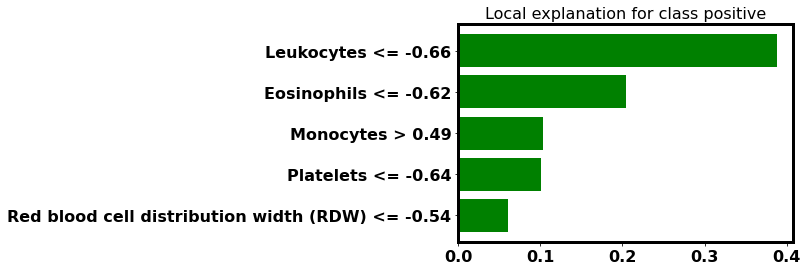

In [147]:
%matplotlib inline
fig = exp.as_pyplot_figure()

**Random Forest**

In [148]:
idx = 0
class_names = ['negative', 'positive']

print('Patient id: %d' % idx)
print('Probability(normal) =', rf.predict_proba(np.array(X_test)[idx, :].reshape(1, -1))[0][0])
print('True class: %s' % class_names[y_test[idx]])

Patient id: 0
Probability(normal) = 0.32
True class: positive


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [149]:
explainer = lime_tabular.LimeTabularExplainer(np.array(X_train), 
                                              feature_names= X_train.columns, class_names = class_names, 
                                              discretize_continuous=True)
exp = explainer.explain_instance(np.array(X_test)[idx, :], predict_fn = rf.predict_proba, num_features = 5)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


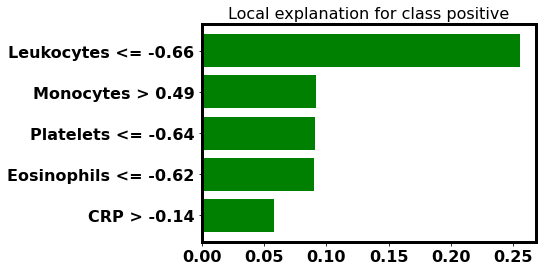

In [150]:
%matplotlib inline
fig = exp.as_pyplot_figure()

**XGBC**

In [151]:
idx = 0
class_names = ['negative', 'positive']

print('Patient id: %d' % idx)
print('Probability(normal) =', xgbc.predict_proba(np.array(X_test)[idx, :].reshape(1, -1))[0][0])
print('True class: %s' % class_names[y_test[idx]])

Patient id: 0
Probability(normal) = 0.07522613
True class: positive


In [152]:
explainer = lime_tabular.LimeTabularExplainer(np.array(X_train),  mode='classification',
                                              feature_names= X_train.columns, class_names = class_names)
exp = explainer.explain_instance(np.array(X_test)[idx, :], predict_fn = xgbc.predict_proba, num_features = 5)

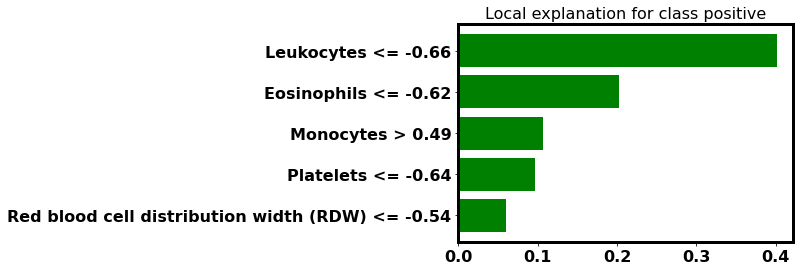

In [153]:
%matplotlib inline
fig = exp.as_pyplot_figure()

**Logistic Regression**

In [154]:
idx = 0
class_names = ['negative', 'positive']

print('Patient id: %d' % idx)
print('Probability(normal) =', lr.predict_proba(np.array(X_test)[idx, :].reshape(1, -1))[0][0])
print('True class: %s' % class_names[y_test[idx]])

Patient id: 0
Probability(normal) = 0.06989898290177532
True class: positive


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


In [155]:
explainer = lime_tabular.LimeTabularExplainer(np.array(X_train),  mode='classification',
                                              feature_names= X_train.columns, class_names = class_names)
exp = explainer.explain_instance(np.array(X_test)[idx, :], predict_fn = lr.predict_proba, num_features = 5)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


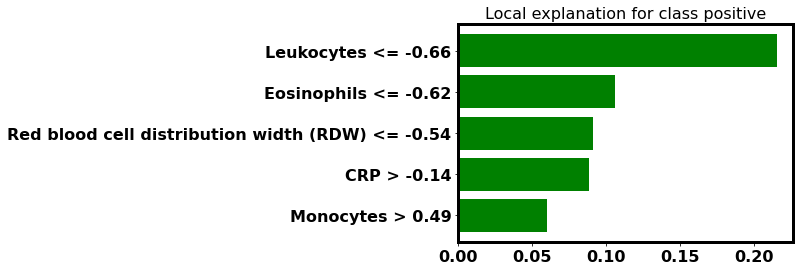

In [156]:
%matplotlib inline
fig = exp.as_pyplot_figure()